In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

## Задания

Продакт-менеджер Василий попросил вас проанализировать совершенные покупки и ответить на следующие вопросы:

1. Сколько у нас пользователей, которые совершили покупку только один раз?


2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?


3. По каждому товару определить, в какой день недели товар чаще всего покупается.


4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?  


5. Выполните когортный анализ пользователей. В период с января по декабрь выявите когорту с самым высоким retention на 3-й месяц. 


6. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.



## Проанализируем датасеты
### olist_customers_dataset.csv — таблица с уникальными идентификаторами пользователей

In [55]:
customers_data = pd.read_csv('~/first_project_data/olist_customers_dataset.csv')
customers_data.head(7)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP


In [56]:
customers_data.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [57]:
customers_data.duplicated().sum()

0

*Будем считать датасет №1 "чистым"*

### olist_orders_dataset.csv —  таблица заказов

In [58]:
orders_data = pd.read_csv('~/first_project_data/olist_orders_dataset.csv', 
                          parse_dates = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                                         'order_delivered_customer_date', 'order_estimated_delivery_date'])
orders_data.head(7)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09


In [59]:
orders_data.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [60]:
orders_data.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [61]:
orders_data.duplicated().sum()

0

In [62]:
orders_data.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

*Присутствуют пропущенные значения. Стоит отметить, что данный датасет будет основным для формулировки понятия "Покупка"*

### olist_order_items_dataset.csv —  товарные позиции, входящие в заказы

In [63]:
items_data = pd.read_csv('~/first_project_data/olist_order_items_dataset.csv',
                         parse_dates = ['shipping_limit_date'])
items_data.head(7)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85


In [64]:
items_data.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [65]:
items_data.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [66]:
items_data.duplicated().sum()

0

*Будем считать датасет №3 "чистым"*

### Сформулируем, что будет считаться покупкой

Покупкой будет считаться заказ, у которого статус не является отмененным(canceled) или недоступным(unavailable), а также есть время подтверждения оплаты заказа(order_approved_at)

### Задание 1

In [67]:
# Объединим датасеты
full_data = customers_data.merge(orders_data, on = 'customer_id')
full_data = full_data.merge(items_data, on = 'order_id')
full_data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


In [68]:
data_1 = full_data.query('(order_status != "unavailable" or order_status !=  "canceled") and order_approved_at != "NaT"')
data_1

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


In [69]:
one_purchase_customer = data_1.groupby('customer_unique_id', as_index = False)\
                                 .agg({'order_id':'count'})\
                                 .query('order_id == 1')
one_purchase_customer

,customer_unique_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
95401,fffcc512b7dfecaffd80f13614af1d16,1
95403,fffea47cd6d3cc0a88bd621562a9d061,1
95404,ffff371b4d645b6ecea244b27531430a,1
95405,ffff5962728ec6157033ef9805bacc48,1


In [70]:
print(f'Количество пользователей, совершивших покупку один раз: {one_purchase_customer.customer_unique_id.nunique()}')

Количество пользователей, совершивших покупку один раз: 83540


### Задание 2
Причины, по которым заказ может быть недоставлен: заказ недоступен(unavailable) или был отменен(canceled)

*__Замечание:__ Стоит отметить, что такой вариант не учитывает те заказы, которые пока что проосто не успели доехать до своих покупателей*

In [71]:
data_2 = orders_data.query('(order_status == "canceled") | (order_status == "unavailable")')
data_2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05
...,...,...,...,...,...,...,...,...
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaT,NaT,2018-02-06
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [72]:
data_2['estimated_delivery_month'] = data_2.order_estimated_delivery_date.dt.strftime('%Y-%m')
data_2.head(7)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,estimated_delivery_month
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,2017-12
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14,2018-08
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,2018-02
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22,2018-02
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,2017-09
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06,2018-02
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23,2018-02


In [73]:
data_2_visual = data_2.groupby(['estimated_delivery_month', 'order_status'], as_index = False).agg({'order_id':'count'})\
                      .rename(columns = {'order_id':'order_amount'})
data_2_visual.head(7)

,estimated_delivery_month,order_status,order_amount
0,2016-09,canceled,1
1,2016-10,canceled,3
2,2016-11,canceled,14
3,2016-11,unavailable,5
4,2016-12,canceled,8
5,2016-12,unavailable,2
6,2017-02,canceled,2


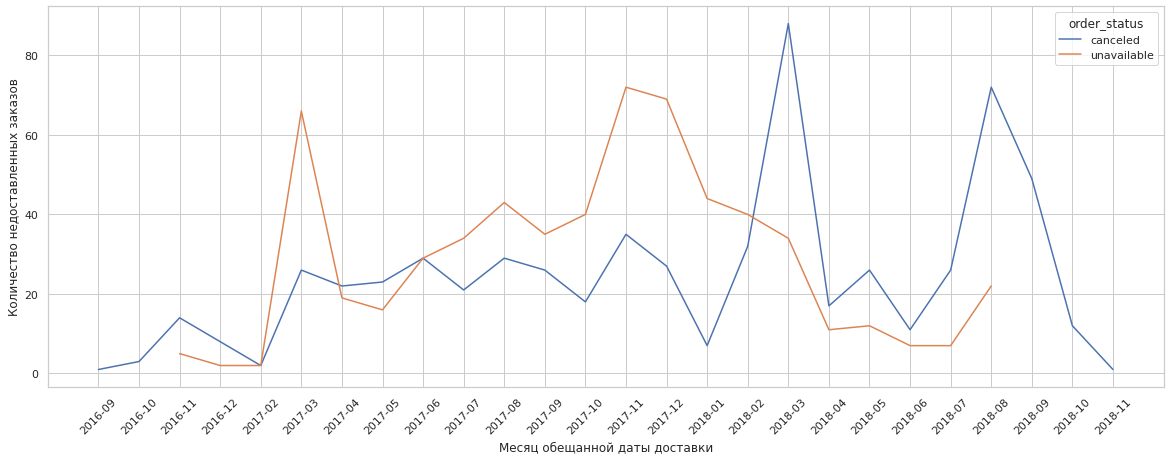

In [74]:
sns.set(
    font_scale=1,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

sns.lineplot(data = data_2_visual, x = 'estimated_delivery_month', y = 'order_amount', hue = 'order_status')

plt.xticks(rotation = 45)
plt.xlabel('Месяц обещанной даты доставки')
plt.ylabel('Количество недоставленных заказов')
plt.show()

### Задание 3
Определять день недели покупки будем по дате подтверждения оплаты заказа (order_approved_at)

Также оставим только те данные, которые подходят под определение "покупка", данное в задании 1

In [75]:
data_3 = orders_data.merge(items_data, on = 'order_id')
data_3 = data_3.query('(order_status != "unavailable" or order_status !=  "canceled") and order_approved_at != "NaT"')
data_3.head(7)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,1,060cb19345d90064d1015407193c233d,8581055ce74af1daba164fdbd55a40de,2017-07-13 22:10:13,147.90,27.36
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,1,a1804276d9941ac0733cfd409f5206eb,dc8798cbf453b7e0f98745e396cc5616,2017-04-19 13:25:17,49.90,16.05


In [76]:
data_3['approved_at_weekday'] = data_3.order_approved_at.dt.day_name()
data_3.head(7)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,approved_at_weekday
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,Thursday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,Tuesday
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,1,060cb19345d90064d1015407193c233d,8581055ce74af1daba164fdbd55a40de,2017-07-13 22:10:13,147.90,27.36,Sunday
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,1,a1804276d9941ac0733cfd409f5206eb,dc8798cbf453b7e0f98745e396cc5616,2017-04-19 13:25:17,49.90,16.05,Thursday


In [77]:
data_3_orders_count = data_3.groupby(['product_id', 'approved_at_weekday'], as_index = False).\
      agg({'order_item_id':'count'}).\
      rename(columns = {'order_item_id':'orders_count'}).\
      sort_values('orders_count', ascending = False).\
      drop_duplicates(subset=["product_id"], keep='first')

data_3_orders_count

,product_id,approved_at_weekday,orders_count
41082,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,119
20152,53b36df67ebb7c41585e8d54d6772e08,Tuesday,105
15933,422879e10f46682990de24d770e7f83d,Tuesday,89
36574,99a4788cb24856965c36a24e339b6058,Tuesday,82
13060,368c6c730842d78016ad823897a372db,Thursday,80
...,...,...,...
23976,63dfa8b12200610ed7b5e41d3c888a25,Saturday,1
23980,63e51e65ec59b56039c6427eed73dcf0,Tuesday,1
23981,63eb97106bfe47fe857edcf78f3e3e08,Saturday,1
23991,63f52009dc3ddb733394e80183aed0f0,Saturday,1


#### Также определим, в какой день недели в целом чаще совершаются покупки

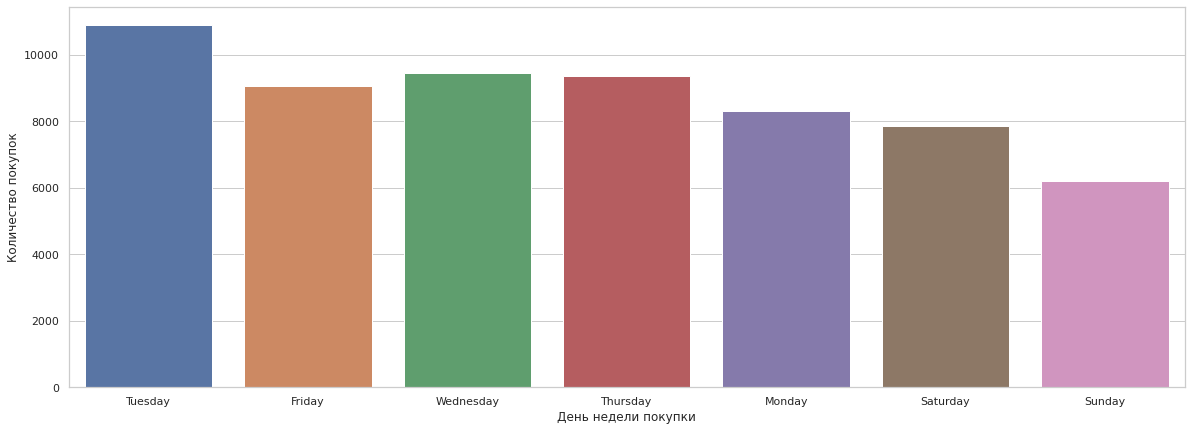

In [78]:
a = data_3.groupby(['product_id', 'approved_at_weekday'], as_index = False).\
      agg({'order_item_id':'count'}).\
      rename(columns = {'order_item_id':'orders_count'}).\
      sort_values('orders_count', ascending = False)

sns.countplot(data = a, x = 'approved_at_weekday')

plt.xlabel('День недели покупки')
plt.ylabel('Количество покупок')
plt.show()

### Задание 4
Определять месяцы и недели снова будем по дате подтверждения оплаты заказа (order_approved_at)

Также оставим только те данные, которые подходят под определение "покупка", данное в задании 1

In [79]:
data_4 = customers_data.merge(orders_data, on = 'customer_id')
data_4 = data_4.query('(order_status != "unavailable" or order_status !=  "canceled") and order_approved_at != "NaT"')
data_4.head(7)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,2018-02-20 16:25:51,2018-03-05


In [80]:
data_4['month'] = data_4.order_approved_at.dt.month_name()
data_4.head(7)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,May
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,January
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,May
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,March
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,July
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04,September
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,2018-02-20 16:25:51,2018-03-05,February


In [81]:
data_4['number_of_weeks'] = data_4.order_approved_at.dt.days_in_month/7
data_4.head(7)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,number_of_weeks
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,May,4.428571
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,January,4.428571
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,May,4.428571
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,March,4.428571
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,July,4.428571
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04,September,4.285714
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,2018-02-20 16:25:51,2018-03-05,February,4.000000


In [82]:
data_4_cust_by_month = data_4.groupby(['customer_unique_id', 'month', 'number_of_weeks'], as_index = False).\
                              agg({'order_id':'count'}).\
                              sort_values('order_id')
data_4_cust_by_month

,customer_unique_id,month,number_of_weeks,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,May,4.428571,1
65027,a9d91b01596a92bb257b5b3a5490ef20,January,4.428571,1
65026,a9d8744833cf1b0851a88057fcd56078,May,4.428571,1
65025,a9d7b1930b1726fae8b6bd573b7dcb11,January,4.428571,1
65024,a9d7acee4c52b9f771c87b3742da7b03,January,4.428571,1
...,...,...,...,...
50535,83e7958a94bd7f74a9414d8782f87628,January,4.428571,4
53936,8d50f5eadf50201ccdcedfb9e2ac8455,August,4.428571,4
67630,b08fab27d47a1eb6deda07bfd965ad43,September,4.285714,4
53937,8d50f5eadf50201ccdcedfb9e2ac8455,July,4.428571,5


In [83]:
data_4_cust_by_month.order_id = data_4_cust_by_month.order_id/data_4_cust_by_month.number_of_weeks
data_4_cust_by_month = data_4_cust_by_month.rename(columns = {'order_id':'avg_purchases'})
data_4_cust_by_month

,customer_unique_id,month,number_of_weeks,avg_purchases
0,0000366f3b9a7992bf8c76cfdf3221e2,May,4.428571,0.225806
65027,a9d91b01596a92bb257b5b3a5490ef20,January,4.428571,0.225806
65026,a9d8744833cf1b0851a88057fcd56078,May,4.428571,0.225806
65025,a9d7b1930b1726fae8b6bd573b7dcb11,January,4.428571,0.225806
65024,a9d7acee4c52b9f771c87b3742da7b03,January,4.428571,0.225806
...,...,...,...,...
50535,83e7958a94bd7f74a9414d8782f87628,January,4.428571,0.903226
53936,8d50f5eadf50201ccdcedfb9e2ac8455,August,4.428571,0.903226
67630,b08fab27d47a1eb6deda07bfd965ad43,September,4.285714,0.933333
53937,8d50f5eadf50201ccdcedfb9e2ac8455,July,4.428571,1.129032


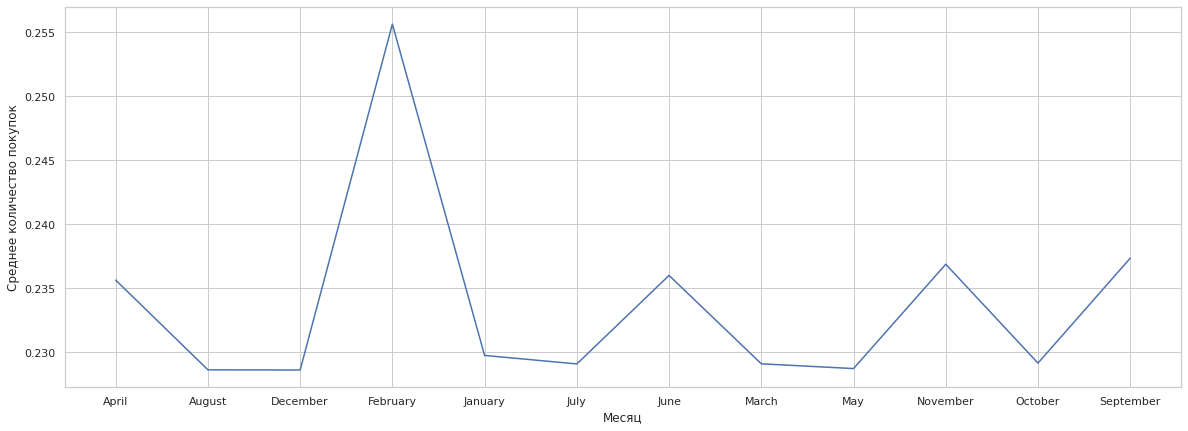

In [84]:
data_4_visual = data_4_cust_by_month.groupby('month', as_index = False).agg({'avg_purchases':'mean'})

sns.lineplot(data = data_4_visual, x = 'month', y = 'avg_purchases')
plt.xlabel('Месяц')
plt.ylabel('Среднее количество покупок')
plt.show()

### Задание 5
Retention rate или коэффициент удержания — это метрика, которая показывает, какой процент пользователей вернулся в продукт спустя N дней после установки приложения/первого посещения

Формула:

$$
Retention N = \frac{Users_{DayN}}{Users_{Day0}}* 100%
$$

Требования к опредлению покупок остаются теми же

In [85]:
data_5 = customers_data.merge(orders_data, on = 'customer_id')
data_5 = data_5.query('(order_status != "unavailable" or order_status !=  "canceled") and order_approved_at != "NaT"')
data_5 = data_5.query('"2017-01-01" <= order_approved_at <= "2018-01-01"')
data_5.head(7)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,2017-11-27 12:44:36,2017-12-08
10,9fb35e4ed6f0a14a4977cd9aea4042bb,2a7745e1ed516b289ed9b29c7d0539a5,39400,montes claros,MG,8428e578bb1cf839ae26a6b7615502b9,delivered,2017-11-27 17:23:20,2017-11-27 18:01:20,2017-11-28 23:04:41,2017-12-08 22:16:17,2017-12-20
12,b2d1536598b73a9abd18e0d75d92f0a3,918dc87cd72cd9f6ed4bd442ed785235,18682,lencois paulista,SP,83d8f70418eefd96f37b483dff430305,delivered,2017-09-09 09:54:57,2017-09-09 10:10:17,2017-09-12 12:42:43,2017-09-20 20:23:34,2017-10-02
18,9b8ce803689b3562defaad4613ef426f,7f3a72e8f988c6e735ba118d54f47458,5416,sao paulo,SP,17825f24877a9289214c301ae0c9424b,delivered,2017-05-11 13:48:47,2017-05-13 11:55:16,2017-05-15 15:30:02,2017-06-07 12:02:14,2017-05-30
19,49d0ea0986edde72da777f15456a0ee0,3e6fd6b2f0d499456a6a6820a40f2d79,68485,pacaja,PA,ab797176e01c2fa3d13aa1fe3e63d9ee,delivered,2017-11-01 21:54:10,2017-11-01 22:06:00,2017-11-06 15:43:02,2017-12-02 01:09:29,2017-12-12


In [86]:
data_5['month'] = data_5.order_approved_at.dt.strftime('%Y-%m')
data_5.head(7)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04,2017-09
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,2017-11-27 12:44:36,2017-12-08,2017-11
10,9fb35e4ed6f0a14a4977cd9aea4042bb,2a7745e1ed516b289ed9b29c7d0539a5,39400,montes claros,MG,8428e578bb1cf839ae26a6b7615502b9,delivered,2017-11-27 17:23:20,2017-11-27 18:01:20,2017-11-28 23:04:41,2017-12-08 22:16:17,2017-12-20,2017-11
12,b2d1536598b73a9abd18e0d75d92f0a3,918dc87cd72cd9f6ed4bd442ed785235,18682,lencois paulista,SP,83d8f70418eefd96f37b483dff430305,delivered,2017-09-09 09:54:57,2017-09-09 10:10:17,2017-09-12 12:42:43,2017-09-20 20:23:34,2017-10-02,2017-09
18,9b8ce803689b3562defaad4613ef426f,7f3a72e8f988c6e735ba118d54f47458,5416,sao paulo,SP,17825f24877a9289214c301ae0c9424b,delivered,2017-05-11 13:48:47,2017-05-13 11:55:16,2017-05-15 15:30:02,2017-06-07 12:02:14,2017-05-30,2017-05
19,49d0ea0986edde72da777f15456a0ee0,3e6fd6b2f0d499456a6a6820a40f2d79,68485,pacaja,PA,ab797176e01c2fa3d13aa1fe3e63d9ee,delivered,2017-11-01 21:54:10,2017-11-01 22:06:00,2017-11-06 15:43:02,2017-12-02 01:09:29,2017-12-12,2017-11


In [87]:
first_purchase_date = data_5.groupby('customer_unique_id', as_index = False)\
                            .agg({'month':'min'})\
                            .rename(columns = {'month':'first_purchase_month'})
first_purchase_date

,customer_unique_id,first_purchase_month
0,0000f46a3911fa3c0805444483337064,2017-03
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10
2,0004aac84e0df4da2b147fca70cf8255,2017-11
3,0005e1862207bf6ccc02e4228effd9a0,2017-03
4,0006fdc98a402fceb4eb0ee528f6a8d4,2017-07
...,...,...
43597,fffbf87b7a1a6fa8b03f081c5f51a201,2017-12
43598,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06
43599,fffea47cd6d3cc0a88bd621562a9d061,2017-12
43600,ffff371b4d645b6ecea244b27531430a,2017-02


In [88]:
data_5 = data_5.merge(first_purchase_date, on = 'customer_unique_id')
data_5

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,first_purchase_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05,2017-05
1,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04,2017-09,2017-09
2,802bb9a59876a712f8380da8f297057c,4c93744516667ad3b8f1fb645a3116a4,89253,jaragua do sul,SC,98b737f8bd00d73d9f61f7344aadf717,delivered,2017-10-15 12:44:13,2017-10-15 13:05:29,2017-10-17 20:05:34,2017-10-25 17:00:04,2017-11-08,2017-10,2017-09
3,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,2017-11-27 12:44:36,2017-12-08,2017-11,2017-11
4,9fb35e4ed6f0a14a4977cd9aea4042bb,2a7745e1ed516b289ed9b29c7d0539a5,39400,montes claros,MG,8428e578bb1cf839ae26a6b7615502b9,delivered,2017-11-27 17:23:20,2017-11-27 18:01:20,2017-11-28 23:04:41,2017-12-08 22:16:17,2017-12-20,2017-11,2017-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44968,27b9b32173455ef32167540451749d0b,277490f0d435b602fe4475d4b89e9181,6727,cotia,SP,326c29ec5b89834b17aea7d85302fd70,delivered,2017-05-24 11:54:31,2017-05-25 02:50:25,2017-05-26 16:12:26,2017-06-02 14:12:38,2017-06-14,2017-05,2017-05
44969,14308d2303a3e2bdf4939b86c46d2679,e7f8760e2bbd2f1986bebd99596c088e,66033,belem,PA,ec3a75fb0ac595e461765d2d854b1d08,delivered,2017-03-15 21:04:08,2017-03-15 21:04:08,2017-03-20 08:34:12,2017-04-05 11:07:12,2017-04-26,2017-03,2017-03
44970,7fe2e80252a9ea476f950ae8f85b0f8f,4b5820135d360a45552b5163835b1d89,35500,divinopolis,MG,c9aea907527f5d4f5fb44955c18a79fb,delivered,2017-12-17 23:13:41,2017-12-18 00:17:27,2017-12-20 18:52:08,2018-01-04 13:08:05,2018-01-23,2017-12,2017-12
44971,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,2017-11,2017-11


In [89]:
data_5 = data_5.groupby(['first_purchase_month', 'month'])\
      .agg({'customer_unique_id':'nunique'})\
      .rename(columns = {'customer_unique_id':'customer_count'})
data_5

customer_count
first_purchase_month month                  
2017-01              2017-01             727
                     2017-02               4
                     2017-03               2
                     2017-04               1
                     2017-05               3
...                                      ...
2017-10              2017-11              30
                     2017-12              13
2017-11              2017-11            7164
                     2017-12              39
2017-12              2017-12            5638

[77 rows x 1 columns]

In [90]:
def make_cohort(data):
    data['cohort_period'] = np.arange(len(data)) + 1
    return data

data_5 = data_5.groupby('first_purchase_month').apply(make_cohort)

In [91]:
data_5

customer_count  cohort_period
first_purchase_month month                                 
2017-01              2017-01             727              1
                     2017-02               4              2
                     2017-03               2              3
                     2017-04               1              4
                     2017-05               3              5
...                                      ...            ...
2017-10              2017-11              30              2
                     2017-12              13              3
2017-11              2017-11            7164              1
                     2017-12              39              2
2017-12              2017-12            5638              1

[77 rows x 2 columns]

In [92]:
data_5.reset_index(inplace = True)
data_5.set_index(['first_purchase_month','cohort_period'], inplace = True)

data_5

month  customer_count
first_purchase_month cohort_period                         
2017-01              1              2017-01             727
                     2              2017-02               4
                     3              2017-03               2
                     4              2017-04               1
                     5              2017-05               3
...                                     ...             ...
2017-10              2              2017-11              30
                     3              2017-12              13
2017-11              1              2017-11            7164
                     2              2017-12              39
2017-12              1              2017-12            5638

[77 rows x 2 columns]

In [93]:
cohort_size_data = data_5.customer_count.groupby('first_purchase_month').first()
cohort_size_data

first_purchase_month
2017-01     727
2017-02    1736
2017-03    2643
2017-04    2324
2017-05    3592
2017-06    3148
2017-07    3844
2017-08    4204
2017-09    4149
2017-10    4433
2017-11    7164
2017-12    5638
Name: customer_count, dtype: int64

In [94]:
retention_data = data_5.customer_count.unstack('cohort_period').divide(cohort_size_data, axis = 0)
retention_data

cohort_period,1,2,3,4,5,6,7,8,9,10,11
first_purchase_month,,,,,,,,,,,
2017-01,1.0,0.005502,0.002751,0.001376,0.004127,0.001376,0.005502,0.001376,0.001376,0.002751,0.002751
2017-02,1.0,0.002304,0.002304,0.001728,0.004032,0.001152,0.002304,0.001728,0.001152,0.002304,0.001152
2017-03,1.0,0.004919,0.003405,0.003405,0.003405,0.001513,0.001513,0.003027,0.003027,0.001135,NaN
2017-04,1.0,0.006024,0.002151,0.001721,0.003012,0.002582,0.003442,0.002582,0.003442,NaN,NaN
2017-05,1.0,0.005290,0.005011,0.003898,0.003062,0.003341,0.004176,0.001670,NaN,NaN,NaN
2017-06,1.0,0.004765,0.003494,0.004130,0.002541,0.003494,0.003812,NaN,NaN,NaN,NaN
2017-07,1.0,0.005203,0.003382,0.002081,0.003382,0.001821,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.006660,0.003568,0.002617,0.003806,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.006508,0.004820,0.003374,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
ur_style = (retention_data
            .style
            .set_caption('User retention by cohort')  # добавляем подпись
            .background_gradient(cmap='Greens')  # раскрашиваем ячейки по столбцам
            .highlight_null('white')  # делаем белый фон для значений NaN
            .format("{:.2%}", na_rep=""))  # числа форматируем как проценты, NaN заменяем на пустоту
ur_style


cohort_period,1,2,3,4,5,6,7,8,9,10,11
first_purchase_month,,,,,,,,,,,
2017-01,100.00%,0.55%,0.28%,0.14%,0.41%,0.14%,0.55%,0.14%,0.14%,0.28%,0.28%
2017-02,100.00%,0.23%,0.23%,0.17%,0.40%,0.12%,0.23%,0.17%,0.12%,0.23%,0.12%
2017-03,100.00%,0.49%,0.34%,0.34%,0.34%,0.15%,0.15%,0.30%,0.30%,0.11%,
2017-04,100.00%,0.60%,0.22%,0.17%,0.30%,0.26%,0.34%,0.26%,0.34%,,
2017-05,100.00%,0.53%,0.50%,0.39%,0.31%,0.33%,0.42%,0.17%,,,
2017-06,100.00%,0.48%,0.35%,0.41%,0.25%,0.35%,0.38%,,,,
2017-07,100.00%,0.52%,0.34%,0.21%,0.34%,0.18%,,,,,
2017-08,100.00%,0.67%,0.36%,0.26%,0.38%,,,,,,
2017-09,100.00%,0.65%,0.48%,0.34%,,,,,,,


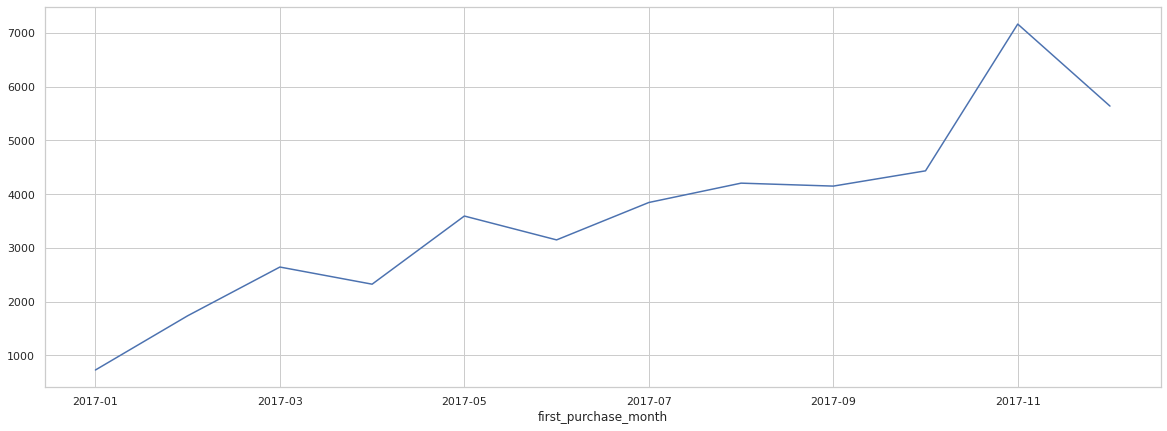

In [96]:
cohort_size_data.plot()

### Задание 6

In [112]:
data_6 = customers_data.merge(orders_data, on = 'customer_id')
data_6 = data_6.merge(items_data, on = 'order_id')
data_6 = data_6.dropna()
data_6.head(7)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04,1,0be701e03657109a8a4d5168122777fb,8f2ce03f928b567e3d56181ae20ae952,2017-09-20 18:25:11,259.90,22.31
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,2018-02-20 16:25:51,2018-03-05,1,b5466db4cecf95c3c1be0ba32538ce1a,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78


In [113]:
data_6 = data_6.query('(order_status != "canceled") | (order_status != "unavailable")')
data_6 = data_6.query('"2017-01-01" <= order_approved_at <= "2018-01-01"')
data_6.head(7)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04,1,0be701e03657109a8a4d5168122777fb,8f2ce03f928b567e3d56181ae20ae952,2017-09-20 18:25:11,259.90,22.31
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,2017-11-27 12:44:36,2017-12-08,1,124f74f703e88efe001a10bfa718b6ff,2a7dc43cecabf23403078e2188437d1d,2017-11-22 19:55:41,19.90,16.11
10,9fb35e4ed6f0a14a4977cd9aea4042bb,2a7745e1ed516b289ed9b29c7d0539a5,39400,montes claros,MG,8428e578bb1cf839ae26a6b7615502b9,delivered,2017-11-27 17:23:20,2017-11-27 18:01:20,2017-11-28 23:04:41,2017-12-08 22:16:17,2017-12-20,1,6b874ff4c71d18e91079b40396bf176a,b6e1504972665f739dec4facb9943775,2017-12-01 18:01:20,25.30,15.10
12,b2d1536598b73a9abd18e0d75d92f0a3,918dc87cd72cd9f6ed4bd442ed785235,18682,lencois paulista,SP,83d8f70418eefd96f37b483dff430305,delivered,2017-09-09 09:54:57,2017-09-09 10:10:17,2017-09-12 12:42:43,2017-09-20 20:23:34,2017-10-02,1,3fc00af0f0a8d4ac2933d3900416c977,7a241947449cc45dbfda4f9d0798d9d0,2017-09-14 10:10:17,99.00,18.31
18,9b8ce803689b3562defaad4613ef426f,7f3a72e8f988c6e735ba118d54f47458,5416,sao paulo,SP,17825f24877a9289214c301ae0c9424b,delivered,2017-05-11 13:48:47,2017-05-13 11:55:16,2017-05-15 15:30:02,2017-06-07 12:02:14,2017-05-30,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2017-05-19 11:55:16,89.90,12.13
19,49d0ea0986edde72da777f15456a0ee0,3e6fd6b2f0d499456a6a6820a40f2d79,68485,pacaja,PA,ab797176e01c2fa3d13aa1fe3e63d9ee,delivered,2017-11-01 21:54:10,2017-11-01 22:06:00,2017-11-06 15:43:02,2017-12-02 01:09:29,2017-12-12,1,a0cb23ea9b98f51407ac7bd1fcd29c2e,7d76b645482be4a332374e8223836592,2017-11-07 22:06:00,28.99,25.63


In [114]:
NOW = data_6.order_approved_at.max() + timedelta(days = 1)
NOW

Timestamp('2018-01-01 23:32:40')

In [121]:
period = 365

In [130]:
RFM = data_6.groupby('customer_unique_id', as_index = False).\
      agg({'order_approved_at': lambda x: (NOW - x.max()).days,
          'order_id': lambda x: len(x),
          'price': lambda x: x.sum()}).\
      rename(columns = {'order_approved_at': 'r_val', 'order_id': 'f_val', 'price': 'm_val'})
RFM

,customer_unique_id,r_val,f_val,m_val
0,0000f46a3911fa3c0805444483337064,297,1,69.00
1,0000f6ccb0745a6a4b88665a16c9f078,81,1,25.99
2,0004aac84e0df4da2b147fca70cf8255,48,1,180.00
3,0005e1862207bf6ccc02e4228effd9a0,302,1,135.00
4,0006fdc98a402fceb4eb0ee528f6a8d4,167,1,13.90
...,...,...,...,...
42058,fffbf87b7a1a6fa8b03f081c5f51a201,5,1,149.00
42059,fffcf5a5ff07b0908bd4e2dbc735a684,207,2,1570.00
42060,fffea47cd6d3cc0a88bd621562a9d061,22,1,64.89
42061,ffff371b4d645b6ecea244b27531430a,328,1,89.90


In [138]:
quintiles = RFM.quantile(q=[0.2, 0.4, 0.6, 0.8]).to_dict()
quintiles

{'r_val': {0.2: 38.0, 0.4: 91.0, 0.6: 155.0, 0.8: 231.0},
 'f_val': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'm_val': {0.2: 39.9,
  0.4: 68.73999999999997,
  0.6: 107.90800000000003,
  0.8: 179.9}}

In [162]:
def rfm_score(x, column):
    if x <= quintiles[column][0.2]:
        return 1
    elif x <= quintiles[column][0.4]:
        return 2
    elif x <= quintiles[column][0.6]:
        return 3
    elif x <= quintiles[column][0.8]:
        return 4
    else:
        return 5
    
def f_score(x):
    if x <= 4:
        return 1
    elif x <= 8:
        return 2
    elif x <= 12:
        return 3
    elif x <= 15:
        return 4
    else:
        return 5

In [171]:
RFM['r_score'] = RFM['r_val'].apply(lambda x: rfm_score(x, 'r_val'))
RFM['f_score'] = RFM['f_val'].apply(lambda x: f_score(x))
RFM['m_score'] = RFM['m_val'].apply(lambda x: rfm_score(x, 'm_val'))

In [172]:
RFM

,customer_unique_id,r_val,f_val,m_val,r_score,f_score,m_score
0,0000f46a3911fa3c0805444483337064,297,1,69.00,5,1,3
1,0000f6ccb0745a6a4b88665a16c9f078,81,1,25.99,2,1,1
2,0004aac84e0df4da2b147fca70cf8255,48,1,180.00,2,1,5
3,0005e1862207bf6ccc02e4228effd9a0,302,1,135.00,5,1,4
4,0006fdc98a402fceb4eb0ee528f6a8d4,167,1,13.90,4,1,1
...,...,...,...,...,...,...,...
42058,fffbf87b7a1a6fa8b03f081c5f51a201,5,1,149.00,1,1,4
42059,fffcf5a5ff07b0908bd4e2dbc735a684,207,2,1570.00,4,1,5
42060,fffea47cd6d3cc0a88bd621562a9d061,22,1,64.89,1,1,2
42061,ffff371b4d645b6ecea244b27531430a,328,1,89.90,5,1,3


In [199]:
RFM['RFM'] = RFM.r_score.astype('str') + RFM.f_score.astype('str') + RFM.m_score.astype('str')
RFM

,customer_unique_id,r_val,f_val,m_val,r_score,f_score,m_score,RFM
0,0000f46a3911fa3c0805444483337064,297,1,69.00,5,1,3,513
1,0000f6ccb0745a6a4b88665a16c9f078,81,1,25.99,2,1,1,211
2,0004aac84e0df4da2b147fca70cf8255,48,1,180.00,2,1,5,215
3,0005e1862207bf6ccc02e4228effd9a0,302,1,135.00,5,1,4,514
4,0006fdc98a402fceb4eb0ee528f6a8d4,167,1,13.90,4,1,1,411
...,...,...,...,...,...,...,...,...
42058,fffbf87b7a1a6fa8b03f081c5f51a201,5,1,149.00,1,1,4,114
42059,fffcf5a5ff07b0908bd4e2dbc735a684,207,2,1570.00,4,1,5,415
42060,fffea47cd6d3cc0a88bd621562a9d061,22,1,64.89,1,1,2,112
42061,ffff371b4d645b6ecea244b27531430a,328,1,89.90,5,1,3,513


In [208]:
result = RFM.groupby('RFM', as_index = False)\
   .agg({'customer_unique_id': 'count'})\
   .rename(columns = {'customer_unique_id':'customer_count'})\
   .sort_values('customer_count', ascending = False)
result.head(7)

,RFM,customer_count
46,511,1944
2,113,1861
3,114,1820
35,411,1804
37,413,1747
25,312,1738
0,111,1737


In [209]:
result['percent'] = round(result.customer_count / result.customer_count.sum(), 5)*100
result.head(7)

,RFM,customer_count,percent
46,511,1944,4.622
2,113,1861,4.424
3,114,1820,4.327
35,411,1804,4.289
37,413,1747,4.153
25,312,1738,4.132
0,111,1737,4.130
